<a href="https://www.kaggle.com/code/pratishthachaturvedi/car-price-prediction-using-catboost?scriptVersionId=198751129" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor

# Loading and checking data

In [2]:
df_train=pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv", index_col='id')

In [3]:
df_test=pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv", index_col='id')

In [4]:
df_train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [5]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [6]:
df_test.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)         ##using this to change scientic format to general
df_train.describe()

,model_year,milage,price
count,188533.00,188533.00,188533.00
mean,2015.83,65705.30,43878.02
std,5.66,49798.16,78819.52
min,1974.00,100.00,2000.00
25%,2013.00,24115.00,17000.00
50%,2017.00,57785.00,30825.00
75%,2020.00,95400.00,49900.00
max,2024.00,405000.00,2954083.00


## Null percentage

In [9]:
pd.set_option('display.float_format', '{:.6f}'.format)
df_train.isnull().sum() + (df_train == '').sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [10]:
pd.set_option('display.float_format', '{:.6f}'.format)
((df_train.isnull().sum() + (df_train == '').sum()) / len(df_train) * 100).round(10)

brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       2.696080
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        1.300568
clean_title    11.360876
price           0.000000
dtype: float64

In [11]:
df_train.duplicated().sum()

0

## Unique values count

In [12]:
df_train.select_dtypes(include='object').nunique().sort_values()

clean_title        1
accident           2
fuel_type          7
transmission      52
brand             57
int_col          156
ext_col          319
engine          1117
model           1897
dtype: int64

# Data Exploration

## Correlation

In [13]:
!pip install dython

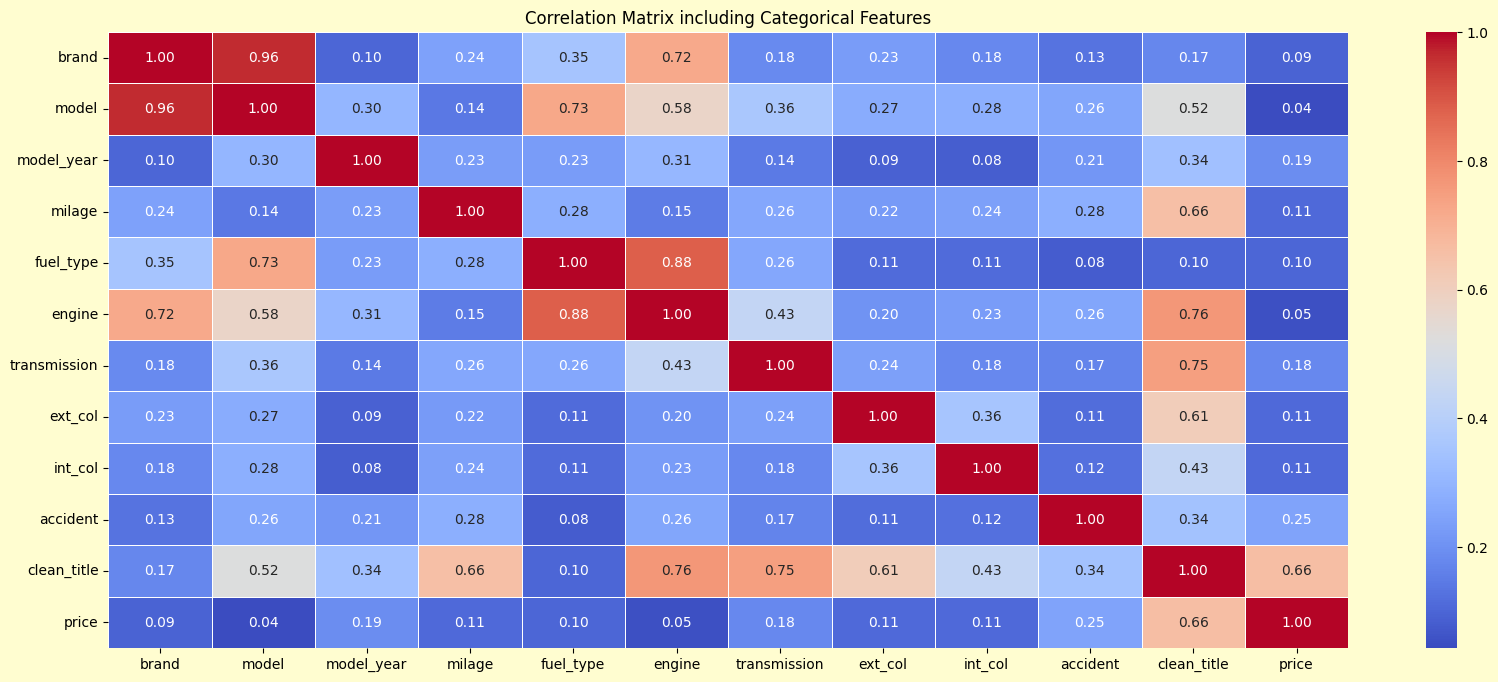

In [14]:
from dython.nominal import associations
associations_df = associations(df_train, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

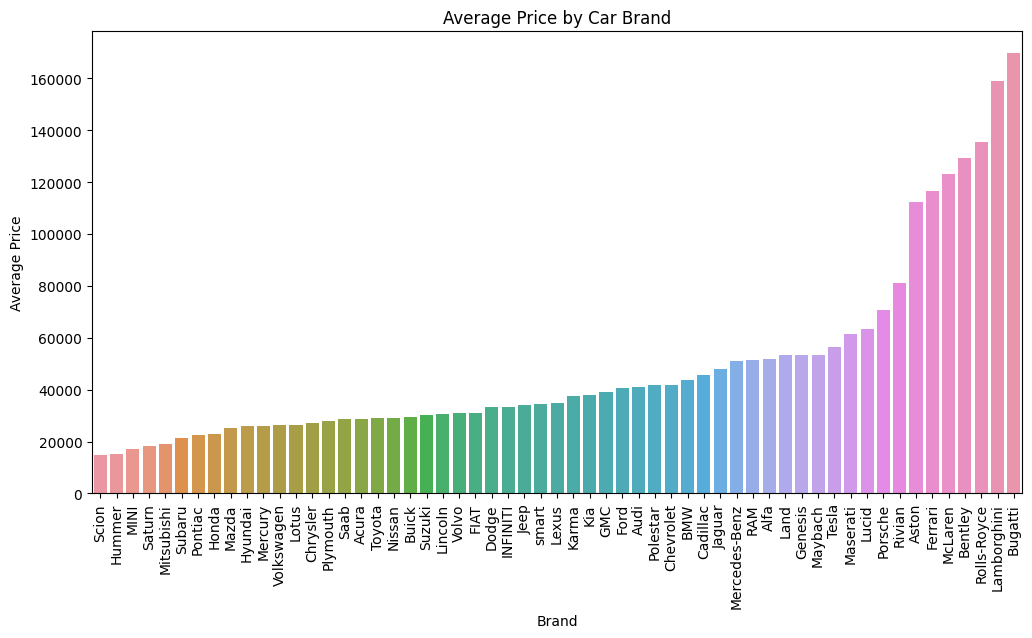

In [15]:
# Group by 'brand' and calculate the mean price, then sort by price
sorted_data = df_train.groupby('brand')['price'].mean().reset_index().sort_values(by='price')

# Plot the sorted data
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=sorted_data, errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)                                          # Rotate brand names for better readability
plt.show()

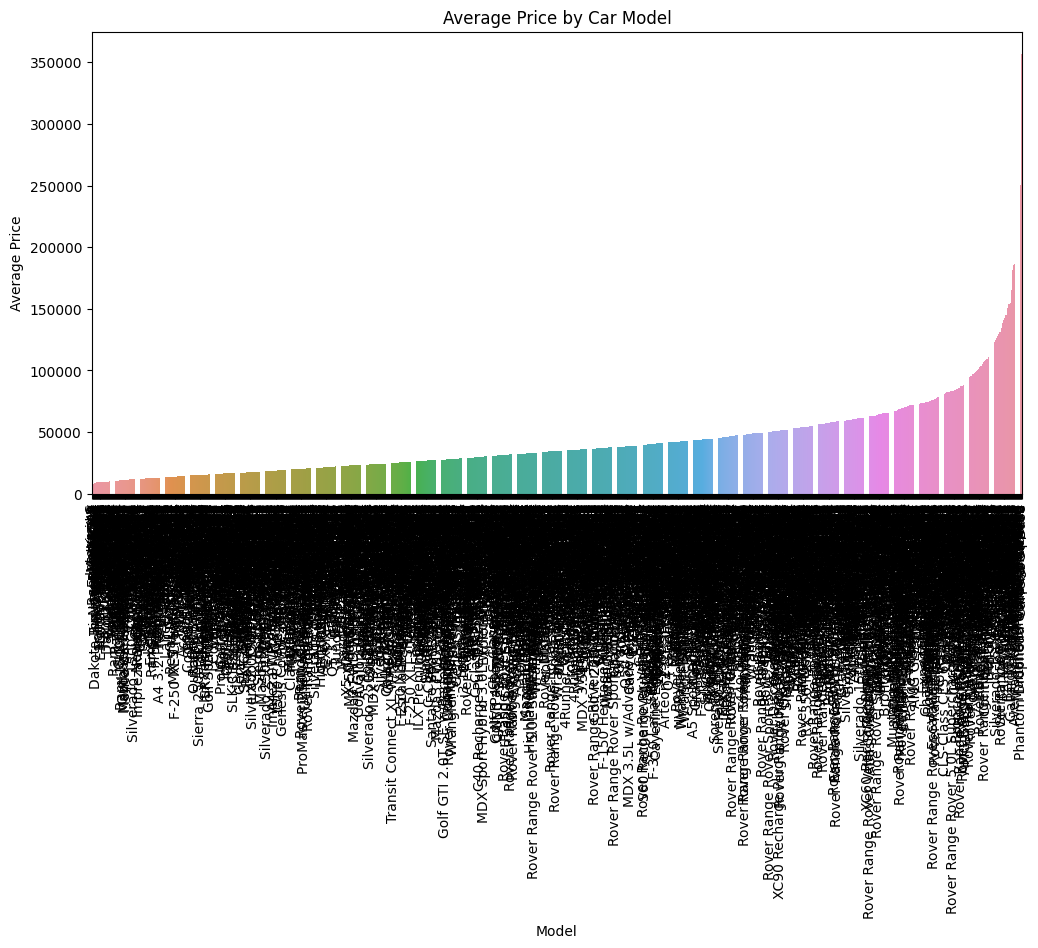

In [16]:
# Group by 'brand' and calculate the mean price, then sort by price
sorted_data = df_train.groupby('model')['price'].mean().reset_index().sort_values(by='price')

# Plot the sorted data
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='price', data=sorted_data, errorbar=None)
plt.title('Average Price by Car Model')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=90)                                          # Rotate brand names for better readability
plt.show()

## Price col nature

In [17]:
df_train['price'].drop_duplicates().nlargest(10)

id
220     2954083
2964    1950995
4164    1599000
5715     749950
7100     695000
1204     649999
3577     599995
8259     599000
1230     491836
3070     489995
Name: price, dtype: int64

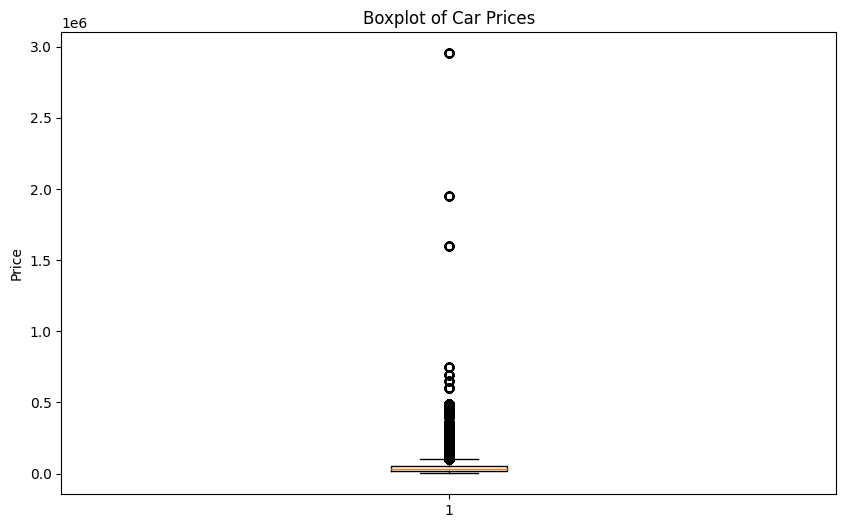

In [18]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_train['price'])
plt.title('Boxplot of Car Prices')
plt.ylabel('Price')
plt.show()

## Other graphs

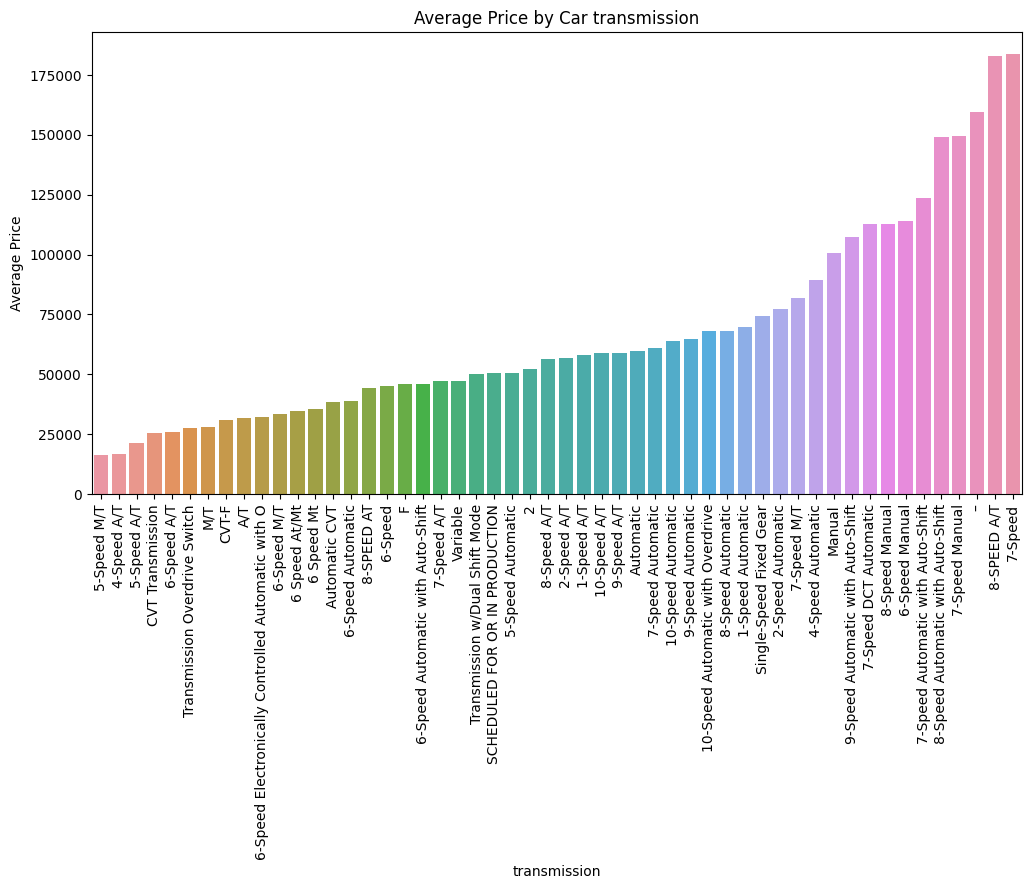

In [19]:
sorted_data = df_train.groupby('transmission')['price'].mean().reset_index().sort_values(by='price')

# Plot the sorted data
plt.figure(figsize=(12, 6))
sns.barplot(x='transmission', y='price', data=sorted_data, errorbar=None)
plt.title('Average Price by Car transmission')
plt.xlabel('transmission')
plt.ylabel('Average Price')
plt.xticks(rotation=90)                                          
plt.show()

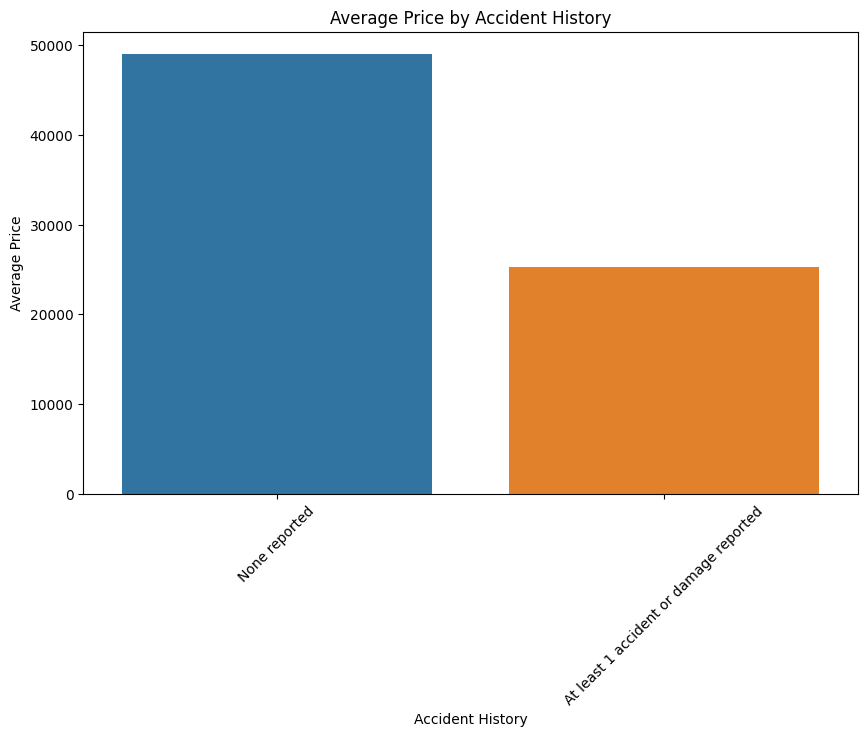

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=df_train, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

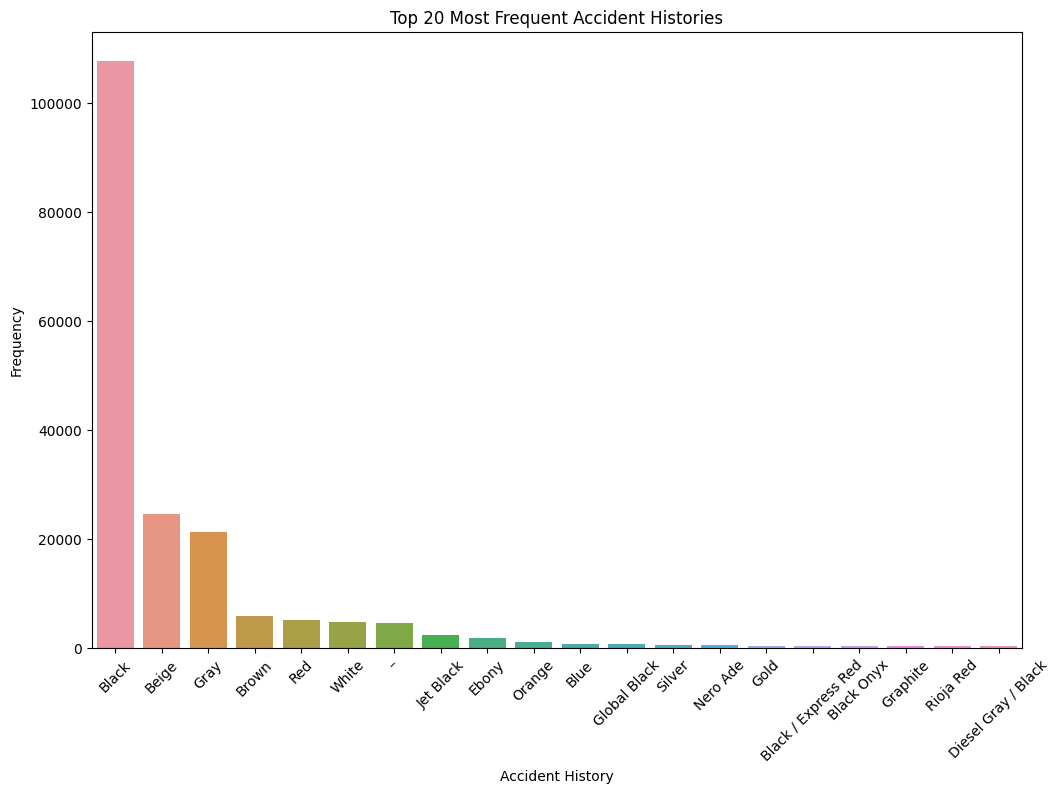

In [21]:
# Count frequency of each value in int_col
frequency = df_train['int_col'].value_counts().reset_index()
frequency.columns = ['int_col', 'count']

# Sort values in descending order
frequency_sorted = frequency.sort_values(by='count', ascending=False)

# Select the top 20 values
top_20_frequency = frequency_sorted.head(20)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='int_col', y='count', data=top_20_frequency, errorbar=None)
plt.title('Top 20 Most Frequent Accident Histories')
plt.xlabel('Accident History')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

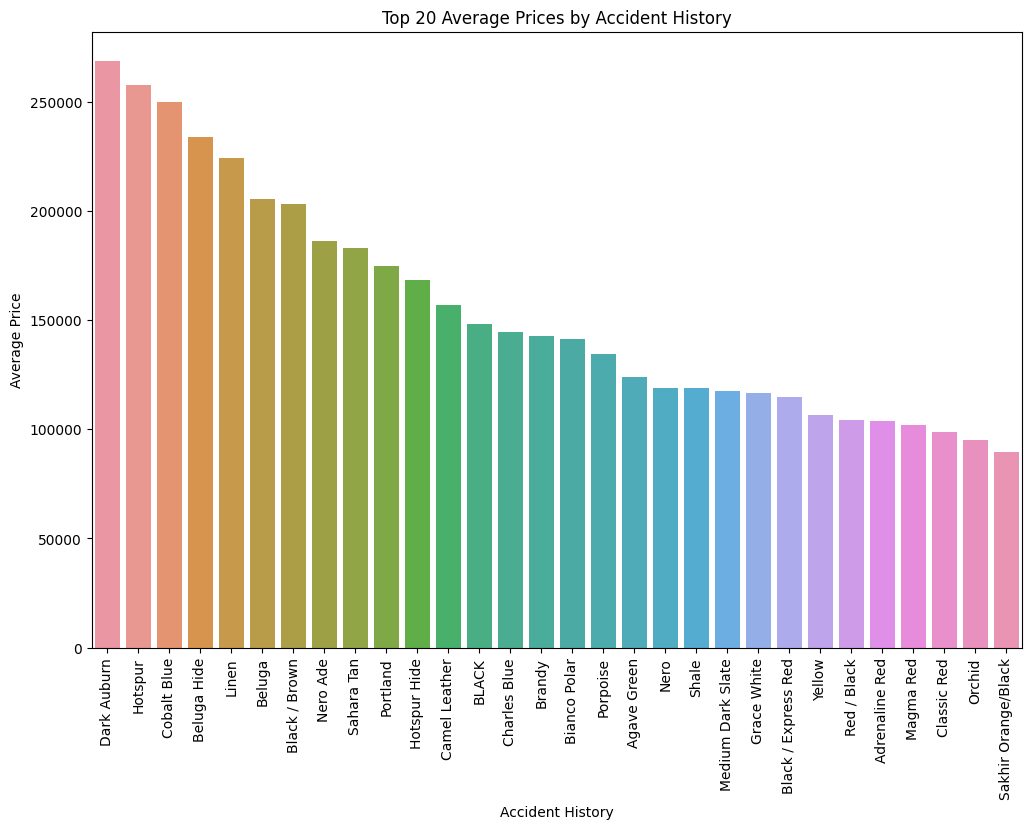

In [22]:
avg_price = df_train.groupby('int_col')['price'].mean().reset_index()

# Sort values in descending order
avg_price_sorted = avg_price.sort_values(by='price', ascending=False)

# Select the top 20 values
top_30_avg_price = avg_price_sorted.head(30)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='int_col', y='price', data=top_30_avg_price, errorbar=None)
plt.title('Top 20 Average Prices by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

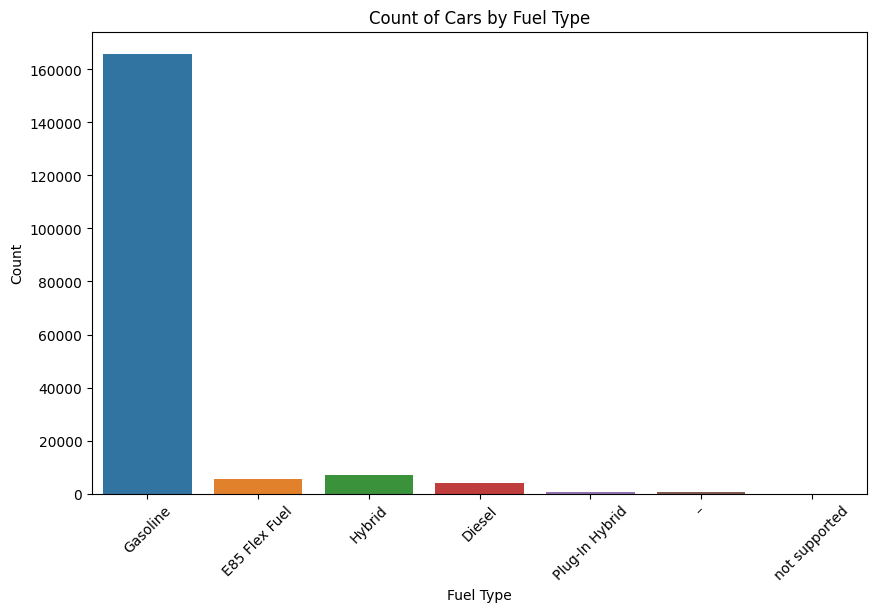

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df_train)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

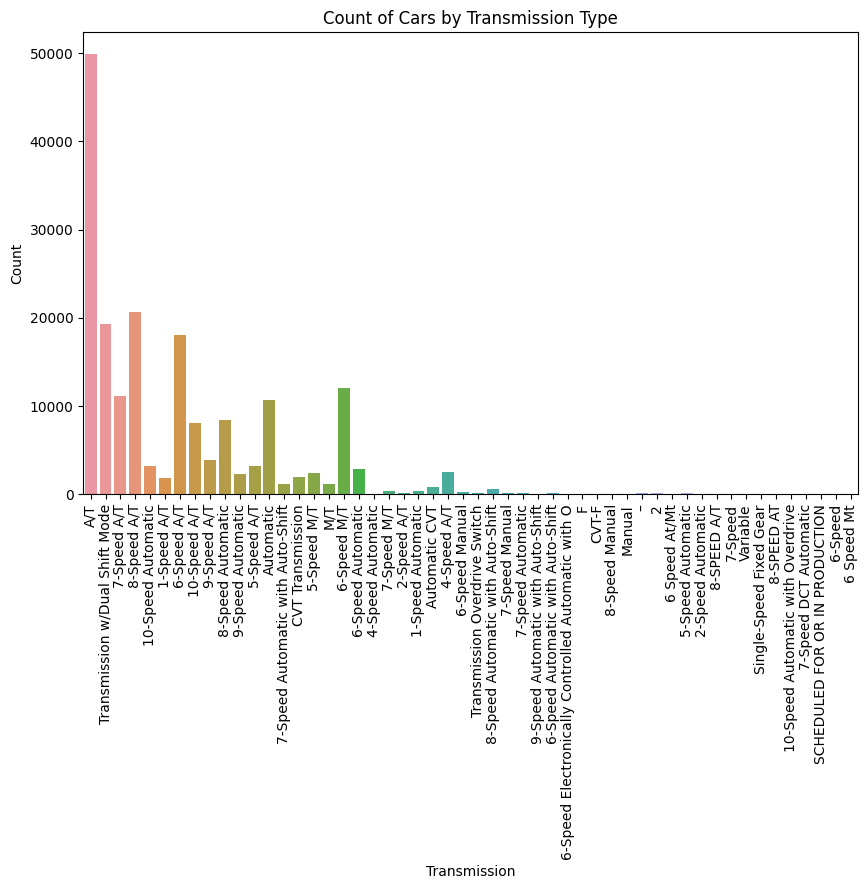

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df_train)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

## Replacing â€“ with blank

#### â€“ is coming as - in python

In [25]:
df_train['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [26]:
df_train = df_train.replace('–', '', regex=True)

## clean_title column variance

In [27]:
df_train['clean_title'] = df_train['clean_title'].map({'Yes': 1, 'No': 0}).fillna(0)
df_train['clean_title'].var()      ##as it has 0 variance, we can drop this

0.10070234235683356

##  Transmission Column Reclassification

In [28]:
# Get unique values in the 'transmission' column, sort them, and convert to DataFrame

df_train['transmission'].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [29]:
# Create a dictionary with the mappings, using regular expressions
transmission_map = {
    r'A/T': 'Automatic',
    r'M/T': 'Manual',
    r'At/Mt': 'Automatic',
    r' Mt': ' Manual',
    r' AT': ' Automatic'
}

# Use the replace() function with regex=True to replace values in the 'transmission' column
df_train['transmission'] = df_train['transmission'].replace(transmission_map, regex=True)

In [30]:
df_train['transmission'].nunique()

38

In [31]:
# List of values to be replaced by 'Other'
values_to_replace = ['2', '–', 'Variable', 'F']

# Replace these values with 'Other' in the 'transmission' column
df_train['transmission'] = df_train['transmission'].replace(values_to_replace, 'Other')
df_train['transmission'] = df_train['transmission'].replace('', 'Unknown')

## Filling Fuel_type blanks using Engine

In [32]:
df_train = df_train.replace('not supported', '', regex=True)
df_train['fuel_type'].replace('', np.nan, inplace=True)

/tmp/ipykernel_30/4127523940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['fuel_type'].replace('', np.nan, inplace=True)


In [33]:
df_train.isnull().sum() + (df_train == '').sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       5879
engine           925
transmission       0
ext_col          366
int_col         4527
accident        2452
clean_title        0
price              0
dtype: int64

In [34]:
def fill_fuel_type(row):
    if pd.isnull(row['fuel_type']):  # Only process rows where fuel_type is missing
        engine_description = row['engine'].lower() if isinstance(row['engine'], str) else ''
        
        if "cylinder engine flex fuel capability" in engine_description:
            return "E85 Flex Fuel"
        elif "hybrid" in engine_description:
            return "Hybrid"
        elif "cylinder engine gasoline fuel" in engine_description:
            return "Gasoline"
        elif "electric motor electric fuel system" in engine_description:
            return "Gasoline"
        elif "diesel" in engine_description:
            return "Diesel"
        elif "cylinder engine plug-in electric/gas" in engine_description:
            return "Plug-In Hybrid"
        else:
            return "Unknown"
    return row['fuel_type']  # Return original value if no change needed

# Apply the function to fill missing fuel_type values
df_train['fuel_type'] = df_train.apply(fill_fuel_type, axis=1)

## Calculating Car Age using model_year

In [35]:
from datetime import datetime
current_year = datetime.now().year
df_train['car_age'] = current_year - df_train['model_year']

## Accident col Reclassification

In [36]:
df_train['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [37]:
# Replace blank strings and nulls with 'Unknown' in the 'accident' column
df_train['accident'].replace('', 'Unknown', inplace=True)
df_train['accident'].fillna('Unknown', inplace=True)

/tmp/ipykernel_30/2230524118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['accident'].replace('', 'Unknown', inplace=True)
/tmp/ipykernel_30/2230524118.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [38]:
accident_mapping = {
    'None reported': 'No',
    'At least 1 accident or damage reported': 'Yes'
}

# Apply the mapping to the 'accident' column
df_train['accident'] = df_train['accident'].replace(accident_mapping)

## Color

In [39]:
df_train[['ext_col', 'int_col']] = df_train[['ext_col', 'int_col']].apply(lambda col: col.str.title())

In [40]:
df_train['ext_col'].replace({'': 'Unknown', None: 'Unknown'}, inplace=True)
df_train['int_col'].replace({'': 'Unknown', None: 'Unknown'}, inplace=True)

/tmp/ipykernel_30/2594254931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['ext_col'].replace({'': 'Unknown', None: 'Unknown'}, inplace=True)
/tmp/ipykernel_30/2594254931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

## Dropping Cols

In [41]:
df_train = df_train.drop(['model_year', 'engine', 'clean_title', 'model'], axis=1)  
df_train.head(5)

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,price,car_age
id,,,,,,,,,
0,MINI,213000,Gasoline,Automatic,Yellow,Gray,No,4200,17
1,Lincoln,143250,Gasoline,Automatic,Silver,Beige,Yes,4999,22
2,Chevrolet,136731,E85 Flex Fuel,Automatic,Blue,Gray,No,13900,22
3,Genesis,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,No,45000,7
4,Mercedes-Benz,7388,Gasoline,7-Speed Automatic,Black,Beige,No,97500,3


# Applying same changes as train to test data

In [42]:
df_test.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes


In [43]:
df_test = df_test.replace('–', '', regex=True)

df_test['transmission'] = df_test['transmission'].replace(transmission_map, regex=True)
df_test['transmission'] = df_test['transmission'].replace(values_to_replace, 'Other')
df_test['transmission'] = df_test['transmission'].replace('', 'Unknown')

df_test = df_test.replace('not supported', '', regex=True)
df_test['fuel_type'].replace('', np.nan, inplace=True)
df_test['fuel_type'] = df_test.apply(fill_fuel_type, axis=1)

df_test['accident'].replace('', 'Unknown', inplace=True)
df_test['accident'].fillna('Unknown', inplace=True)
df_test['accident'] = df_test['accident'].replace(accident_mapping)

df_test['car_age'] = current_year - df_test['model_year']

df_test[['ext_col', 'int_col']] = df_test[['ext_col', 'int_col']].apply(lambda col: col.str.title())

df_test['ext_col'].replace({'': 'Unknown', None: 'Unknown'}, inplace=True)
df_test['int_col'].replace({'': 'Unknown', None: 'Unknown'}, inplace=True)

df_test = df_test.drop(['model_year', 'engine', 'clean_title', 'model'], axis=1)  

/tmp/ipykernel_30/3486911122.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['fuel_type'].replace('', np.nan, inplace=True)
/tmp/ipykernel_30/3486911122.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [44]:
pd.set_option('display.float_format', '{:.6f}'.format)
df_test.isnull().sum() + (df_test == '').sum()

brand           0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
car_age         0
dtype: int64

# Modeling

## Train test split

In [45]:
df_train.columns

Index(['brand', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'price', 'car_age'],
      dtype='object')

In [46]:
X = df_train[['brand', 'milage', 'fuel_type', 'transmission','accident', 'car_age', 
              'ext_col', 'int_col']]
y = df_train['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## CatBoostRegressor

In [48]:
# Identify the categorical columns (these are object or categorical type columns)
categorical_cols = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 
                    'accident']

# Initialize CatBoostRegressor with some hyperparameters
model = CatBoostRegressor(
    iterations=600,               # Number of boosting iterations
    learning_rate=0.1,            # Learning rate
    depth=6,                      # Depth of each tree
    eval_metric='RMSE',           # Evaluation metric
    random_seed=42,               # For reproducibility
    cat_features=categorical_cols # Specify which columns are categorical
)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

# Evaluate the model
y_pred = model.predict(X_test)

# Optionally, print model performance (e.g., RMSE)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse}")

0:	learn: 79024.2569903	test: 73690.9932325	best: 73690.9932325 (0)	total: 218ms	remaining: 2m 10s
100:	learn: 73834.9701673	test: 68581.9240376	best: 68581.4352783 (99)	total: 10.4s	remaining: 51.2s
200:	learn: 73227.2223340	test: 68548.0295513	best: 68535.6086160 (163)	total: 20.6s	remaining: 40.9s
300:	learn: 72786.5572909	test: 68535.0514116	best: 68535.0514116 (300)	total: 31.1s	remaining: 30.9s
400:	learn: 72317.5786445	test: 68518.2422354	best: 68515.0850524 (397)	total: 42.2s	remaining: 20.9s
500:	learn: 71833.9769973	test: 68505.0277488	best: 68495.0259855 (430)	total: 56.4s	remaining: 11.1s
599:	learn: 71463.4052026	test: 68530.0513801	best: 68495.0259855 (430)	total: 1m 6s	remaining: 0us

bestTest = 68495.02599
bestIteration = 430

Shrink model to first 431 iterations.
Test RMSE: 68495.02598553944


In [49]:
df_train['price'].mean()

43878.01617753921